#### Importando Pandas

In [1]:
import pandas as pd

#### Cargando el DataSet

In [4]:
# Cargar el dataset
file_path = './data/ds_salaries.csv'
df = pd.read_csv(file_path)

# Mostrar las primeras 5 filas del dataset
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


#### Eliminando registros duplicados

* Ver los duplicados

In [5]:
# Identificar filas duplicadas
duplicados = df[df.duplicated()]

# Mostrar las filas duplicadas
duplicados

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
115,2023,SE,FT,Data Scientist,150000,USD,150000,US,0,US,M
123,2023,SE,FT,Analytics Engineer,289800,USD,289800,US,0,US,M
153,2023,MI,FT,Data Engineer,100000,USD,100000,US,100,US,M
154,2023,MI,FT,Data Engineer,70000,USD,70000,US,100,US,M
160,2023,SE,FT,Data Engineer,115000,USD,115000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
3439,2022,MI,FT,Data Scientist,78000,USD,78000,US,100,US,M
3440,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M
3441,2022,SE,FT,Data Engineer,115000,USD,115000,US,100,US,M
3586,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L


* Eliminando los duplicados

In [7]:
# Eliminar duplicados
df_limpiados = df.drop_duplicates() #retorna el dataset sin los datos duplicados

# Verificar la cantidad de filas antes y después
rows_antes = len(df) #contamos la cantidad de duplicados
rows_despues = len(df_limpiados) #contamos la cantidad de filas limpias (sin duplicados)

print(f'Filas antes de eliminar duplicados: {rows_antes}')
print(f'Filas despues de eliminar duplicados: {rows_despues}')

Filas antes de eliminar duplicados: 3755
Filas despues de eliminar duplicados: 2584


#### Vemos los tipos de datos 

In [9]:
# Verificar los tipos de datos de cada columna
df_limpiados.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

#### Consistencia de los valores de categorias

* Primero pasamos los datos a mayusculas para evitar cualquier variacion por diferencias por ejemplo (que haya un 'Dato' != 'dato')
* Nos aseguramos que sea unico

In [10]:
# Asegurar consistencia en la columna 'experience_level'
df_limpiados['experience_level'] = df_limpiados['experience_level'].str.upper()

# Verificar los valores unicos para confirmar la consistencia
df_limpiados['experience_level'].unique()


/var/folders/5d/7gh47wqd111dyfvyv6wz8xtw0000gn/T/ipykernel_16489/343618350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpiados['experience_level'] = df_limpiados['experience_level'].str.upper()


array(['SE', 'MI', 'EN', 'EX'], dtype=object)

#### Manejo de valore faltantes (nulos)

In [11]:
# Comprobar si hay valores faltantes
df_limpiados.isnull().sum() #vemos cuales son nulos y sumamos para tener la cantidad total

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

#### Deteccion de valores atipicos

###### https://www.ibm.com/docs/es/spss-modeler/saas?topic=series-outliers

In [12]:
# 1. Calcular el primer cuartil (Q1) y el tercer cuartil (Q3) del salario en USD
q1 = df_limpiados['salary_in_usd'].quantile(0.25)  # Q1: 25% de los datos
q3 = df_limpiados['salary_in_usd'].quantile(0.75)  # Q3: 75% de los datos

#Q1 se obtiene el cuartil inferior donde e 25% de los salarios es menor.
#Q3 se obtiene el cuartil superior donde el 75% de los salarios es menor

# 2. Calcular el rango intercuartil (IQR), que es la diferencia entre Q3 y Q1
iqr = q3 - q1

'''
    iqr(Rango intercuartil), se obtiene la diferencia entre los cuartiles superior e inferior,
    lo que representaria la dispersion de los salarios en el rango medio del dataset
    https://es.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6th/v/calculating-interquartile-range-iqr#:~:text=Para%20encontrar%20el%20rango%20intercuartil,diferencia%20entre%20Q3%20y%20Q1.
    https://ikusmira.org/p/limite-inferior-de-clase-y-limite-superior-de-clase
'''

# 3. Definir los limites inferior y superior para detectar valores atipicos
# Limite inferior: cualquier valor por debajo de este limite se considera atipico
limite_inferior = q1 - 1.5 * iqr

# Limite superior: cualquier valor por encima de este limite se considera atipico
limite_superior = q3 + 1.5 * iqr

'''
    El valor de 1.5 se considera un equilibrio estandar para muchos conjuntos de datos.

'''
# 4. Identificar los valores atipicos (fuera de los limites establecidos)
# Filtrar los datos donde el salario es menor que el limite inferior o mayor que el limite superior
valores_atipicos = df_limpiados[(df_limpiados['salary_in_usd'] < limite_inferior) | (df_limpiados['salary_in_usd'] > limite_superior)]

# Mostrar los valores atipicos encontrados
valores_atipicos

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
33,2023,SE,FT,Computer Vision Engineer,342810,USD,342810,US,0,US,M
133,2023,SE,FT,Machine Learning Engineer,342300,USD,342300,US,0,US,L
145,2023,SE,FT,Machine Learning Engineer,318300,USD,318300,US,100,US,M
228,2023,EX,FT,Head of Data,329500,USD,329500,US,0,US,M
478,2023,EX,FT,Director of Data Science,353200,USD,353200,US,0,US,M
488,2023,SE,FT,Data Scientist,317070,USD,317070,US,0,US,M
528,2023,SE,FT,AI Scientist,1500000,ILS,423834,IL,0,IL,L
649,2023,SE,FT,Data Architect,376080,USD,376080,US,100,US,M
845,2023,MI,FT,Research Scientist,340000,USD,340000,US,100,US,M
1105,2023,SE,FT,Data Scientist,370000,USD,370000,US,0,US,M


##### Importamos matplotlib y seaborn

* matplotlib: https://matplotlib.org/
* seaborn: https://seaborn.pydata.org/

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualizaciones univariadas

*  https://www5.uva.es/estadmed/datos/univariante/univar.htm

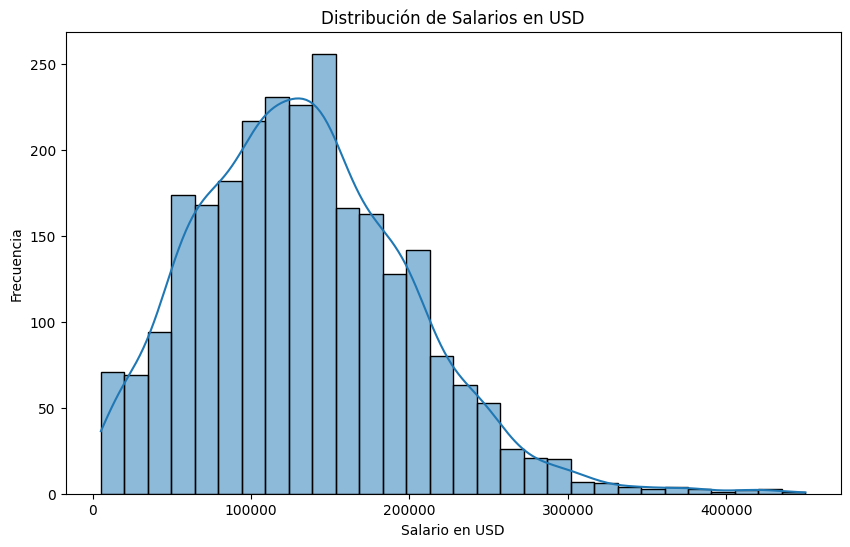

In [15]:
#Histograma del salario en USD
plt.figure(figsize=(10, 6))  # Crear una figura de 10x6 pulgadas.
sns.histplot(df_limpiados['salary_in_usd'], bins=30, kde=True)  # Crear un histograma de la variable 'salary_in_usd'.
# Parametros:
# - df_limpiados['salary_in_usd']: Columna de salarios en USD.
# - bins=30: Numero de "bins" (intervalos o barras) en el histograma.
# - kde=True: Incluir la curva de densidad kernel (kde) que suaviza la distribucion del histograma.
plt.title('Distribución de Salarios en USD')  # Titulo del grafico.
plt.xlabel('Salario en USD')  # Etiqueta del eje X.
plt.ylabel('Frecuencia')  # Etiqueta del eje Y (frecuencia de salarios en cada intervalo).
plt.show()  # Mostrar el grafico.

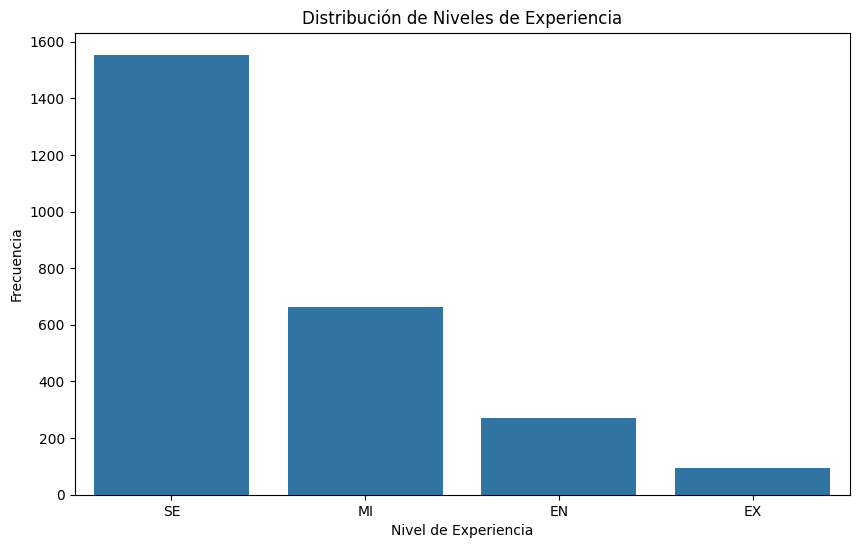

In [17]:
#Grafico de barras del nivel de experiencia
plt.figure(figsize=(10, 6))  # Crear una figura de 10x6 pulgadas
sns.countplot(x='experience_level', data=df_limpiados)  # Crear un grafico de barras en base a la columna 'experience_level'
# Parametros:
# - x='experience_level': Define que el eje X sera la columna 'experience_level'
# - data=df_limpiados: Indica que estamos utilizando los datos del dataframe 'df_limpiados'
plt.title('Distribución de Niveles de Experiencia')  # Titulo del grafico
plt.xlabel('Nivel de Experiencia')  # Etiqueta del eje X
plt.ylabel('Frecuencia')  # Etiqueta del eje Y
plt.show()  # Mostrar el grafico

##### Visualizaciones multivariadas

* https://es.wikipedia.org/wiki/Estad%C3%ADstica_multivariante

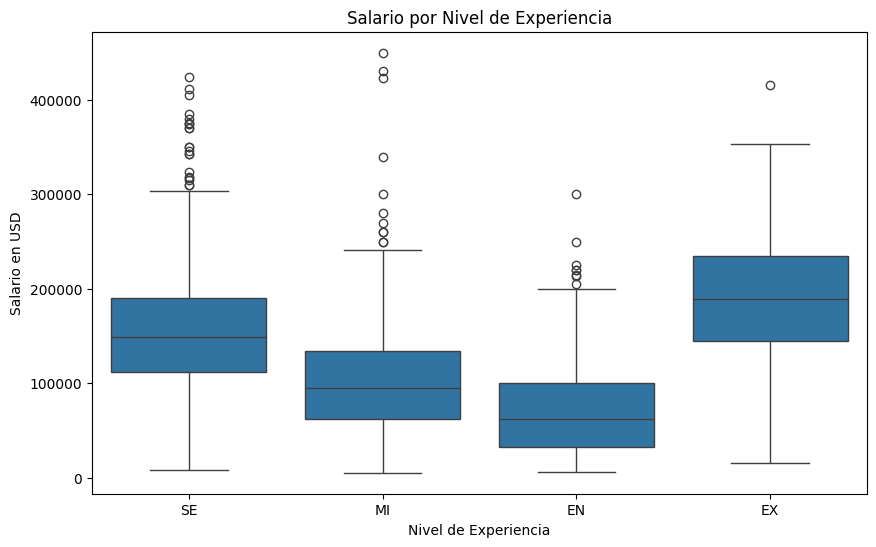

In [18]:
# Boxplot del salario en USD por nivel de experiencia
plt.figure(figsize=(10, 6))  # Crear una figura de 10x6 pulgadas
sns.boxplot(x='experience_level', y='salary_in_usd', data=df_limpiados)  # Crear el boxplot
# Parámetros:
# - x='experience_level': La variable categorica en el eje X
# - y='salary_in_usd': La variable numerica en el eje Y (salario en USD)
# - data=df_cleaned: El dataframe que contiene los datos.
plt.title('Salario por Nivel de Experiencia')  # Agregar un titulo al grafico
plt.xlabel('Nivel de Experiencia')  # Etiqueta del eje X
plt.ylabel('Salario en USD')  # Etiqueta del eje Y
plt.show()  # Mostrar el grafico


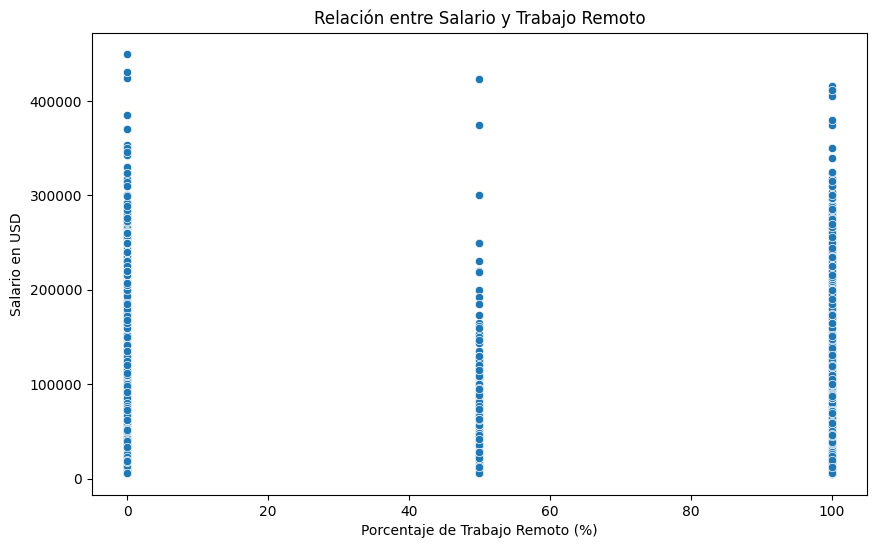

In [19]:
#Grqfico de dispersion salario vs porcentaje de trabajo remoto
plt.figure(figsize=(10, 6))  # Crear una figura de 10x6 pulgadas
sns.scatterplot(x='remote_ratio', y='salary_in_usd', data=df_limpiados)  # Crear el scatterplot
# Parámetros:
# - x='remote_ratio': La variable en el eje X (porcentaje de trabajo remoto)
# - y='salary_in_usd': La variable en el eje Y (salario en USD)
# - data=df_limpiados: El dataframe que contiene los datos
plt.title('Relación entre Salario y Trabajo Remoto')  # Agregar un titulo al grafico
plt.xlabel('Porcentaje de Trabajo Remoto (%)')  # Etiqueta del eje X
plt.ylabel('Salario en USD')  # Etiqueta del eje Y
plt.show()  # Mostrar el grafico

##### Estadisticas descriptivas y tendencias

In [24]:
# Resumen estadistico de las variables numericas
print(df_limpiados.describe())

# Tendencia: Salario promedio por nivel de experiencia
salary_by_experience = df_limpiados.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=False)
salary_by_experience

         work_year        salary  salary_in_usd  remote_ratio
count  2584.000000  2.584000e+03    2584.000000   2584.000000
mean   2022.301084  2.103653e+05  133409.280186     50.483746
std       0.749179  8.080375e+05   67136.837329     48.163707
min    2020.000000  6.000000e+03    5132.000000      0.000000
25%    2022.000000  9.000000e+04   84975.000000      0.000000
50%    2022.000000  1.346300e+05  130000.000000     50.000000
75%    2023.000000  1.825625e+05  175000.000000    100.000000
max    2023.000000  3.040000e+07  450000.000000    100.000000


experience_level
EX    191078.208333
SE    153897.435650
MI    101828.783133
EN     72648.685185
Name: salary_in_usd, dtype: float64

* Pandas: https://pandas.pydata.org/docs/reference/index.html#api